# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27872.40
The current value of your 5.3 ETH is $3246.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2020-12-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.75  117.77  3587353  367.72   

                                                               
                             high     low     close    volume  
2020-12-08 00:00:00-05:00  370.78  367.67  370.1599  32702217

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].iloc[0]
spy_close_price = df_portfolio["SPY"]["close"].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.77
Current SPY closing price: $370.1599


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18507.99
The current value of your 200 AGG shares is $23554.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings dictionary
amount_data = {
    "amount": [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
}

# Create Index Ticks
ticks = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=ticks)

# Display savings DataFrame
display(df_savings)

,amount
crypto,31118.597
shares,42061.995


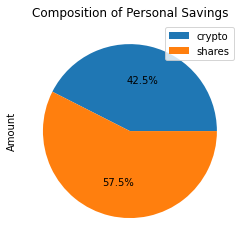

In [16]:
# Plot savings pie chart
plt.pie(np.array(df_savings["amount"]).ravel(), autopct="%1.1f%%");

# Set title
plt.title("Composition of Personal Savings")

# Set Y Label
plt.ylabel("Amount")

# Set Legend
plt.legend(df_savings.index);

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings["amount"].sum()

# Calculate Savings Delta
delta = round(savings - emergency_fund,2)

# Calculate Goal Needs
goal_needs = round((emergency_fund - savings),2)

# Validate saving health
if savings > emergency_fund:
    print(f"Congratulations! You are over your savings goal by ${delta}")
elif savings == emergency_fund:
    print(f"Congratulations! You have reached your savings goal.")
else:
    print(f"You still need to save ${goal_needs} to reach your goal.")

Congratulations! You are over your savings goal by $37180.59


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-13', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199.0   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233.0   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084.0   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   

                              SPY                                      
                             open    high      low   close     volume  
2015-11-13 00:00:00-05:00  204.35  204.67  202.435  202.54  120335951  
2015-11-16 00:00:00-05:00  202.32  205.64  202.180  205.60   90591238  
2015-11-17 00:00:00-05:00  205.99  207.04  204.880  205.38  100515112  
2015-11-18 00:00:00-05:00  206.04  208.90  205.990  208.71   94448031  
2015-11-19 00:00:00-05:00  208.59  209.05  208.200  208.53   61897641

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-13 00:00:00-05:00  108.48  108.59  108.4459  108.57  2714199.0   
2015-11-16 00:00:00-05:00  108.63  108.70  108.5600  108.63  3037233.0   
2015-11-17 00:00:00-05:00  108.49  108.78  108.3600  108.71  2111084.0   
2015-11-18 00:00:00-05:00  108.65  108.71  108.5400  108.62  1824597.0   
2015-11-19 00:00:00-05:00  108.76  108.90  108.6800  108.68  2655263.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
2015-11-13 00:00:00-05:00          NaN  204.35  204.67  202.435  202.54   
2015-11-16 00:00:00-05:00     0.000553  202.32  205.64  202.180  205.60   
2015-11-17 00:00:00-05:00     0.000736  205.99  207.04  204.880  205.38   
2015-11-18 00:00:00-05:00    -0.000828  206.04  208.90  205.990  208.71   
2015-11-19 00:00:00-05:00     0.000552  208.59  209.05  208.200  208.53   

                                                   
                              volume daily_return  
2015-11-13 00:00:00-05:00  120335951          NaN  
2015-11-16 00:00:00-05:00   90591238     0.015108  
2015-11-17 00:00:00-05:00  100515112    -0.001070  
2015-11-18 00:00:00-05:00   94448031     0.016214  
2015-11-19 00:00:00-05:00   61897641    -0.000862

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007688,1.000482,1.004193,1.004237,0.991093,0.987535,1.004015,0.996809,1.000231,0.989892,...,1.003737,1.008365,0.998560,0.999886,0.997456,0.995879,1.005700,0.993396,1.014806,1.007119
2,1.006829,0.997309,1.002666,1.000679,0.986787,0.991161,1.002300,0.989665,1.005544,0.991050,...,0.998721,1.015025,0.996174,1.007977,0.991330,0.995790,0.993493,0.994281,1.016871,1.011619
3,1.013207,0.993175,0.996117,1.000639,0.993065,0.980108,1.005768,0.993186,1.005377,1.002080,...,0.998112,1.019354,1.002606,1.006588,0.992760,0.987766,0.988532,0.989053,1.011119,1.012769
4,1.027427,0.998816,1.003235,0.995313,0.999154,0.968570,1.003146,0.997678,0.995430,1.016595,...,0.991441,1.027388,1.002979,1.013016,0.991176,0.988019,0.984380,0.985835,1.010945,1.010748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.841902,5.348465,9.759790,20.654543,5.133891,7.223239,7.209423,6.845615,14.337810,13.539624,...,6.969990,3.929399,11.548241,4.919264,17.803291,26.956673,9.504380,3.205476,11.793337,9.295050
7557,6.844445,5.413779,9.774499,20.493096,5.150014,7.188939,7.248373,6.893157,14.458560,13.563329,...,6.983758,3.918599,11.704893,4.960804,17.912309,27.225583,9.556148,3.226108,11.734651,9.243438
7558,6.756844,5.406849,9.792393,20.617079,5.136014,7.199168,7.285889,6.884669,14.354473,13.643651,...,7.045622,3.926166,11.649190,4.965298,17.937118,27.053276,9.591405,3.223965,11.740102,9.094095
7559,6.780952,5.384487,9.901919,20.634922,5.210512,7.193922,7.258665,6.898061,14.383184,13.713534,...,7.004869,3.910097,11.572862,4.973612,17.757341,27.129029,9.537610,3.229545,11.864815,9.055499


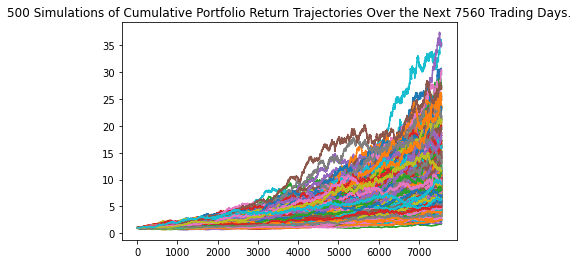

In [24]:
# Plot simulation outcomes
thirty_line_plot = MC_thirty_year.plot_simulation()
thirty_line_plot;

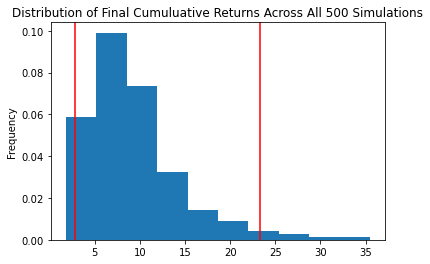

In [25]:
# Plot probability distribution and confidence intervals
thirty_dist_plot = MC_thirty_year.plot_distribution()
thirty_dist_plot;

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(thirty_tbl)

count           500.000000
mean              9.333317
std               5.229431
min               1.804993
25%               5.768537
50%               8.162992
75%              11.124549
max              35.502432
95% CI Lower      2.839399
95% CI Upper     23.314789
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
thirty_initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
thirty_ci_lower = round(thirty_tbl[8]*thirty_initial_investment,2)
thirty_ci_upper = round(thirty_tbl[9]*thirty_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${thirty_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_ci_lower} and ${thirty_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56787.97 and $466295.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
new_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
thirty_ci_lower = round(thirty_tbl[8]*new_initial_investment,2)
thirty_ci_upper = round(thirty_tbl[9]*new_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${thirty_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${thirty_ci_lower} and ${thirty_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85181.96 and $699443.68


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252 *5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994306,1.009062,1.001078,0.996291,0.989876,0.999349,1.001700,0.995235,0.998751,1.001576,...,1.006152,0.991689,0.999246,0.999252,1.004547,1.002717,0.998344,0.997430,0.999665,1.010343
2,0.997391,1.010622,1.002366,0.990662,0.990473,0.989107,1.001126,1.008214,1.004957,1.009668,...,0.997363,0.986033,0.998637,1.008825,1.017404,1.003748,1.003836,0.997437,0.999113,1.013164
3,0.995864,1.012611,0.996849,1.006673,0.985870,0.993306,1.003633,1.015066,1.017206,1.012167,...,1.007254,0.982477,0.989825,1.009979,1.019292,1.005664,1.000397,1.005553,1.003242,1.012275
4,0.992196,1.019974,0.998808,1.009265,0.989573,0.987431,0.993405,1.016168,1.017868,1.005486,...,0.998747,0.975837,0.999075,1.006254,1.015755,1.026405,0.989387,1.002647,0.995150,1.001501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.170681,1.716636,1.510155,1.401569,1.088303,1.250810,1.405074,1.480403,1.315663,1.634137,...,2.190276,1.853734,1.719939,1.725277,2.230956,1.078034,1.306426,1.794023,1.455281,1.539743
1257,1.166499,1.720836,1.505366,1.405146,1.090159,1.249207,1.411233,1.462479,1.307654,1.627715,...,2.206775,1.852093,1.723309,1.735847,2.229438,1.087756,1.305684,1.783331,1.459443,1.542347
1258,1.160198,1.733606,1.513715,1.421552,1.082656,1.261751,1.416237,1.472235,1.307426,1.636792,...,2.211650,1.840369,1.715043,1.728283,2.257724,1.112514,1.309544,1.777377,1.465832,1.543263
1259,1.163599,1.754042,1.504123,1.421067,1.082674,1.249316,1.422671,1.478164,1.309496,1.649095,...,2.195255,1.853948,1.724551,1.729342,2.254266,1.105214,1.308601,1.766113,1.464499,1.529705


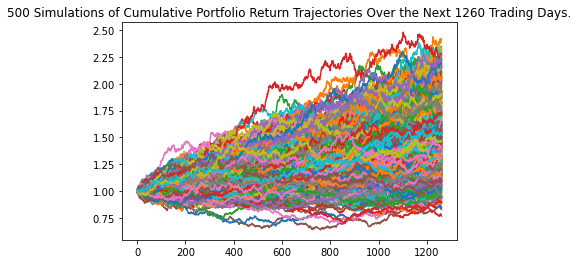

In [37]:
# Plot simulation outcomes
five_line_plot = MC_five_year.plot_simulation()
five_line_plot;

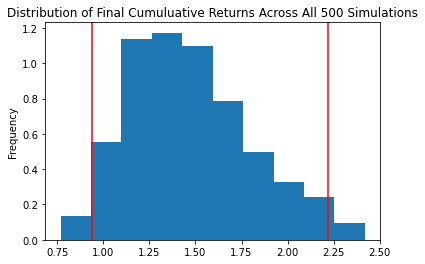

In [38]:
# Plot probability distribution and confidence intervals
five_dist_plot = MC_five_year.plot_distribution()
five_dist_plot;

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              1.470603
std               0.333664
min               0.766581
25%               1.215921
50%               1.434663
75%               1.683108
max               2.420400
95% CI Lower      0.940147
95% CI Upper      2.221371
Name: 1260, dtype: float64


In [40]:
# Set initial investment
five_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
five_ci_lower = round(five_tbl[8]*five_initial_investment,2)
five_ci_upper = round(five_tbl[9]*five_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${five_ci_lower} and ${five_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56408.82 and $133282.24


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000666,1.007134,1.005892,1.014097,1.001298,0.989655,1.010188,1.005664,1.001898,1.006800,...,0.998003,0.998336,1.011960,0.999941,0.997220,0.998070,1.001613,1.011486,0.994240,0.993141
2,1.004513,1.008440,1.000443,1.017946,0.989626,0.986096,1.010626,1.006329,1.003532,1.004893,...,1.001777,0.991597,1.019969,0.999079,1.000853,1.001467,1.002038,1.003566,0.997300,0.987377
3,1.002030,1.008761,1.005614,1.014413,0.999728,0.983497,1.005670,1.006071,1.008605,1.009479,...,1.004121,0.991928,1.023689,0.995479,1.008063,1.002425,1.003669,0.998235,1.004082,0.991260
4,1.004338,1.016425,1.003450,1.006387,0.993559,0.993303,1.004005,1.005148,1.004251,1.008777,...,1.000507,0.989127,1.026284,1.012540,1.009245,1.007129,0.995409,0.995741,0.997408,0.996280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.468367,1.949656,2.913668,2.629521,1.435188,1.133195,2.159184,3.050544,0.835892,2.344576,...,1.531972,1.608279,1.053417,1.967158,1.750442,3.681318,1.190714,1.326487,3.989974,3.239225
2517,1.477685,1.947997,2.908710,2.613622,1.444345,1.120481,2.144193,3.049779,0.836230,2.359711,...,1.548693,1.603314,1.060783,1.974290,1.762920,3.695859,1.198628,1.333283,4.054383,3.218400
2518,1.483477,1.943021,2.930037,2.625110,1.427504,1.109362,2.147699,3.045845,0.838071,2.344642,...,1.543944,1.601474,1.058643,1.962799,1.750335,3.695514,1.194321,1.349829,4.091680,3.203888
2519,1.485749,1.927132,2.912581,2.638914,1.433512,1.112608,2.156723,3.043386,0.839391,2.362046,...,1.542657,1.625544,1.056182,1.978890,1.718074,3.697279,1.184387,1.348141,4.130358,3.217414


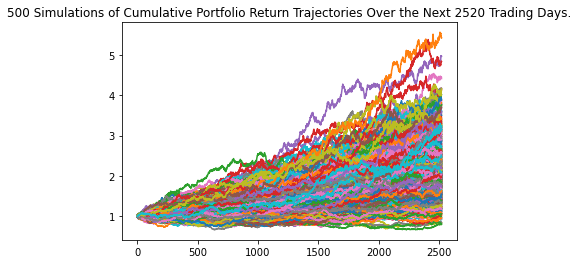

In [43]:
# Plot simulation outcomes
ten_line_plot = MC_ten_year.plot_simulation()
ten_line_plot;

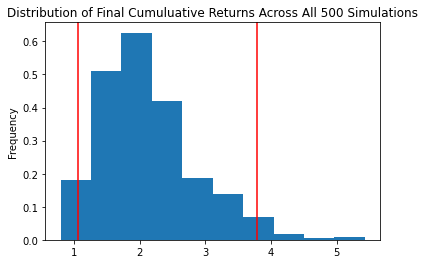

In [44]:
# Plot probability distribution and confidence intervals
ten_dist_plot = MC_ten_year.plot_distribution()
ten_dist_plot;

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              2.112707
std               0.728169
min               0.796060
25%               1.569434
50%               1.976229
75%               2.515432
max               5.426979
95% CI Lower      1.056708
95% CI Upper      3.784155
Name: 2520, dtype: float64


In [46]:
# Set initial investment
ten_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ten_ci_lower = round(ten_tbl[8]*ten_initial_investment,2)
ten_ci_upper = round(ten_tbl[9]*ten_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ten_ci_lower} and ${ten_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63402.51 and $227049.28
